# <center>Aprendizaje No Supervisado</center>
**Instructor:** Eduardo Marín Nicolalde

## Introducción
El presente taller contiene un breve recorrido sobre las principales técnicas de aprendizaje no supervisado:
* Análisis de Componentes Principales (PCA)
* K-Means Clustering
* Hierarchical Clustering

El aprendizaje no supervisado dentro de Machine Learning hace referencia a un conjunto de técnicas aplicadas a un conjunto de datos que no han sido etiquetados: **No contiene una variable objetivo a modelar**.

El principal objetivo de este conjunto de técnicas está en identificar comunialidades entre las observaciones/variables

En el presente laboratorio presentaremos un ejemplo de como usar Support Vector Machines usando ```scikit-learn```.

## 0. Tabla de Contenidos
<ol start="1">
<li> Objetivos de Aprendizaje </li>
<li> Nombre del Algoritmo</li>
<li> Importar Librerías </li>
<li> Preparación de los datos </li>
<li> Train/Test Split </li>
<li> Implementación </li>
<li> Cross-Validation </li>
<li> Evaluación del Modelo </li>
<li> Ejercicios </li>
<li> Bibliografía </li>
</ol>

## 1. Objetivos de Aprendizaje
Este laboratorio ilustrará como utilizar las librerías de ```scikit-learn``` para entrenar modelos de Aprendizaje No Supervisado.

* Comprensión básica de los algoritmo
* Entrenamiento de algoritmos con ```sklearn```
* Visualización e interpretación de resultados.

## 3. Importar Librerías
Las librerías que utilizaremos serán:
* ```Python``` (>= 3.6),
* ```NumPy``` (>= 1.16.3),
* ```Pandas``` (>= 0.24.2),
* ```Scikit-learn``` (>= 0.21.1),
* ```Matplotlib``` (>= 3.0.3)

In [ ]:
import numpy as np
import pandas as pd

#Gráficos
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
# Verificación de versiones de librerías usadas
print('La versión de Numpy es {}'.format(np.__version__))
print('La versión de Pandas es {}'.format(pd.__version__))
import sklearn
print('La versión de Scikit-learn es {}'.format(sklearn.__version__))
import matplotlib
print('La versión de Matplotlib es {}'.format(matplotlib.__version__))

La versión de Numpy es 1.23.5
La versión de Pandas es 1.5.3
La versión de Scikit-learn es 1.2.2
La versión de Matplotlib es 3.7.1


## 4. Preparación de los datos



In [ ]:
# Data
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
iris["species"].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

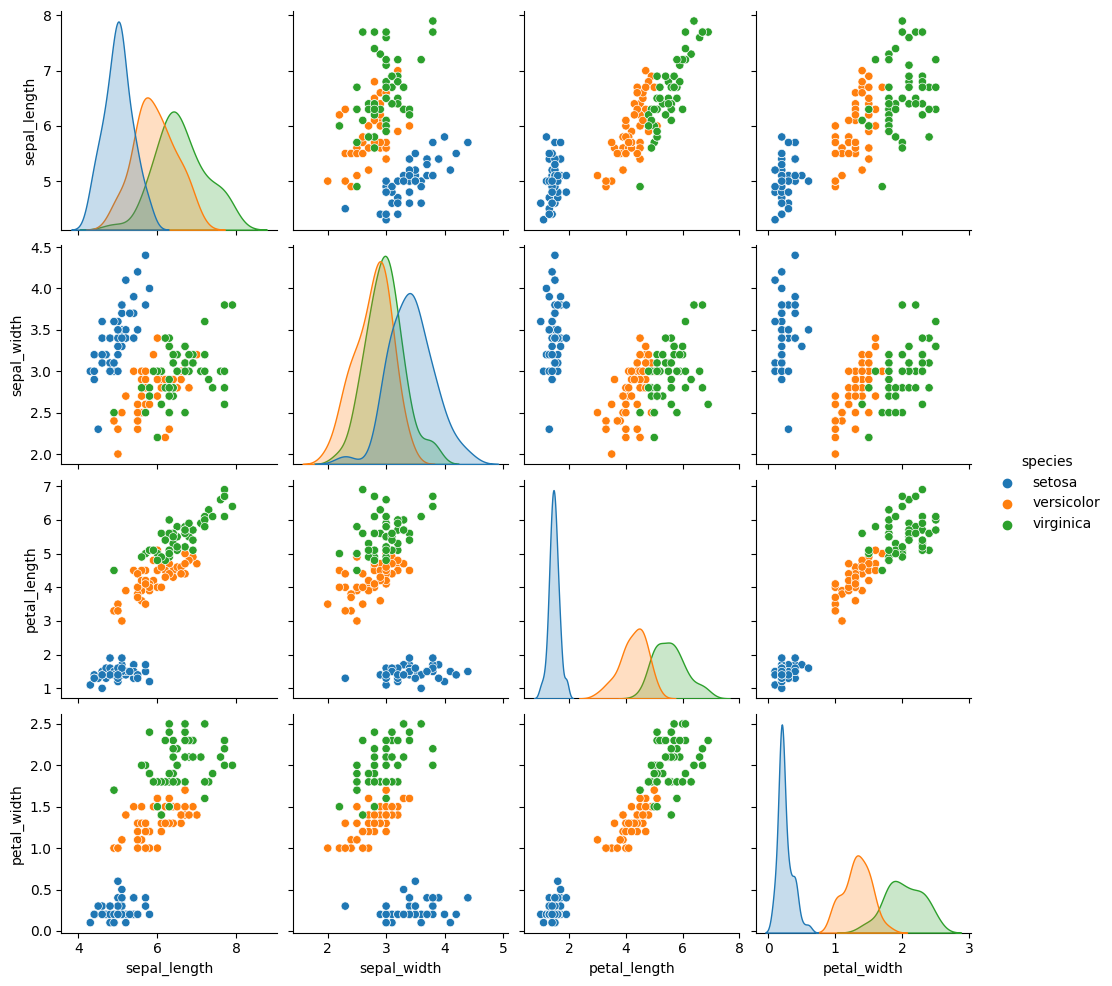

In [ ]:
sns.pairplot(iris, hue="species")

#### LabelEncoder
El método LabelEncoder puede utilizarse para transformar variables categóricas en numéricas.

In [ ]:
from sklearn.preprocessing import LabelEncoder

#Inicializar instancia y ajuste
species = LabelEncoder()
species.fit(iris["species"])

#Transformar a valores numéricos
y = species.transform(iris["species"])
print(type(y))
y.shape

<class 'numpy.ndarray'>


(150,)

In [ ]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
#Para obtener los valores originales de la variable transformada
species.inverse_transform(y)

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolo

Para obtener la matriz de diseño $\textbf{X}$

In [ ]:
X = iris.iloc[:,[0,1,2,3]]
X = X.values
print (type(X))
X.shape

<class 'numpy.ndarray'>


(150, 4)

## 5. Train/Test Split
Vamos a realizar un split de 80/20.

In [ ]:
from sklearn import model_selection
# Separar en datos de entrenamiento y validacion
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y,
                                                                    test_size=0.2,
                                                                    random_state=42)


In [ ]:
print("X_train tiene dimensiones: ", X_train.shape)
print("X_test tiene dimensiones:"  , X_test.shape)
print("y_train tiene dimensiones: ", y_train.shape)
print("y_test tiene dimensiones: " , y_test.shape)

X_train tiene dimensiones:  (120, 4)
X_test tiene dimensiones: (30, 4)
y_train tiene dimensiones:  (120,)
y_test tiene dimensiones:  (30,)


## 6. K-Means Clustering

**Ventajas**
* Simple y computacionalmente eficiente
* Muy intuitivo y fácil de visualizar

**Desventajas**
* Evaluación confía en intuición y no en métricas definidas

Usando Scikit-learn, debemos primero importar la instancia de ```sklearn.cluster.KMeans```, e invocar los métodos necesarios:

1. Preparar los datos X
2. Crear instancia de ```sklearn.cluster.KMeans```:

``` python
km = KMeans(n_clusters = 3,
            init       = "random",
            n_jobs     = 4,
            random_state = 42
                       )
```
3. Entrenar:
```
km.fit(X)
```
4. Identificar etiquetas de clasificación:
```
km.labels_
```

A continuación describiremos los argumentos más comunes:


---
**```sklearn.cluster.KMeans(n_clusters=8, init=’k-means++’, n_init=10, max_iter=300, tol=0.0001, precompute_distances=’auto’, verbose=0, random_state=None, copy_x=True, n_jobs=None, algorithm=’auto’)[source]```**

[Documentación](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans)





In [ ]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters = 3,
            init = "random",
            random_state = 42)
km.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(init='random', n_clusters=3, random_state=42)

In [ ]:
# Inercia:
# Suma de los cuadrados de las distancias de las observaciones respecto de sus centros
km.inertia_

78.851441426146

In [ ]:
km.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [ ]:
km.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [ ]:
species.inverse_transform(km.labels_)

array(['versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'setosa', 'setosa', 'virginica',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'seto

Text(0.5, 1.0, 'K-Means')

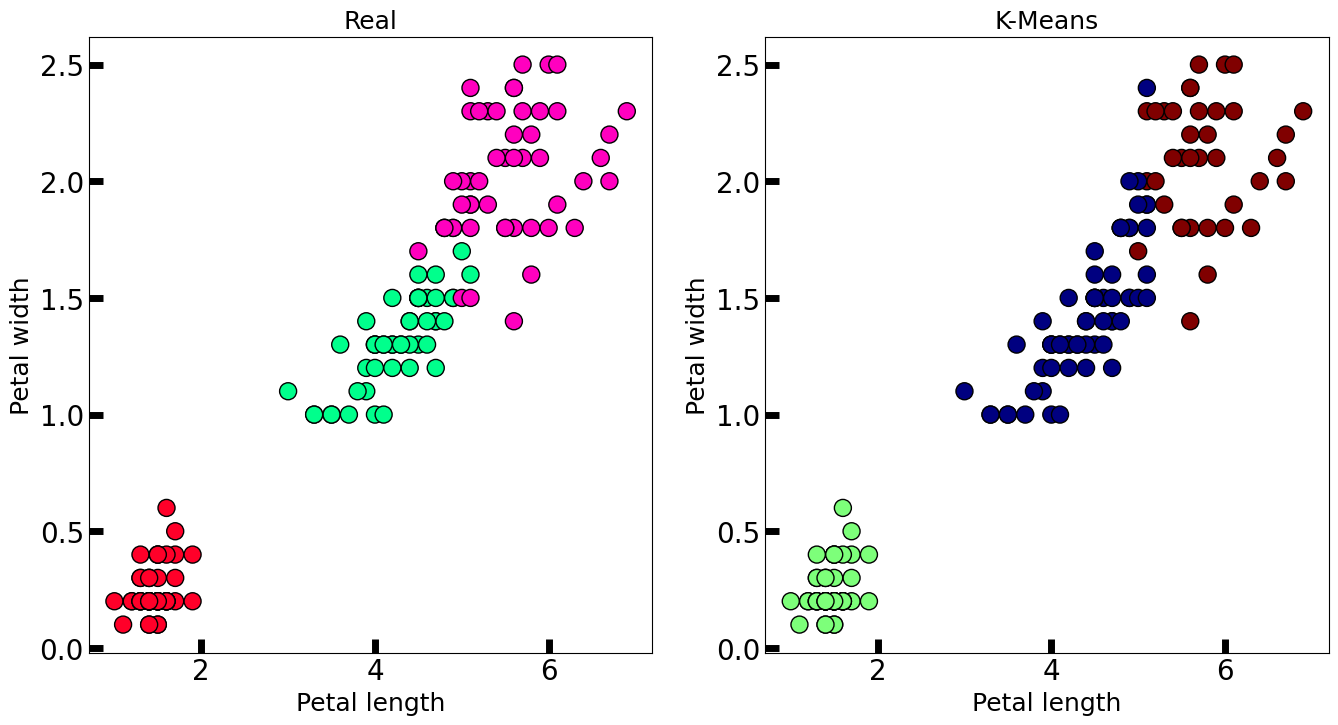

In [ ]:
#Resuultados de la clasificación

new_labels = km.labels_

# Plot de los clusters identificados y reales

fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].scatter(X[:, 2], X[:, 3], c=y, cmap='gist_rainbow',edgecolor='k', s=150)
axes[1].scatter(X[:, 2], X[:, 3], c=new_labels, cmap='jet',edgecolor='k', s=150)
axes[0].set_xlabel('Petal length', fontsize=18)
axes[0].set_ylabel('Petal width', fontsize=18)
axes[1].set_xlabel('Petal length', fontsize=18)
axes[1].set_ylabel('Petal width', fontsize=18)
axes[0].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[1].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[0].set_title('Real', fontsize=18)
axes[1].set_title('K-Means', fontsize=18)

#### Trabajando con Train y Test sets
Evidentemente, podemos hacer una comparación de resultados de clustering ya que conocemos el número de clusters en esta base de datos.

En la vida real trabajammos con un conjunto de datos cuya agrupación es desconocida. Por ello, entrenaremos el algoritmo con datos de entrenamiento y haremos una predicción de la clasificación, misma que será comparada con el Test Set.


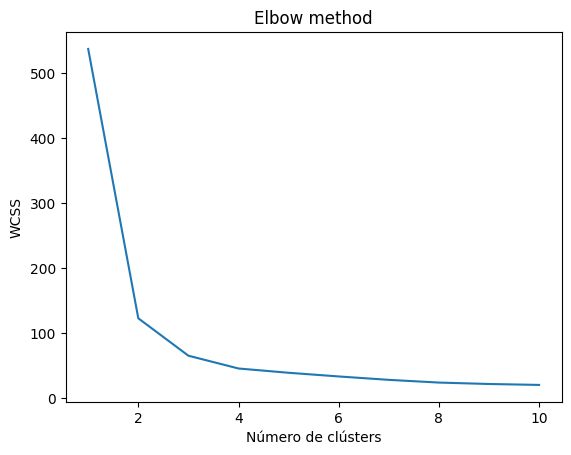

In [ ]:
# Para encontrar el número óptimo de clusters
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters   = i,
                    init         = 'k-means++',
                    max_iter     = 300,
                    n_init       = 10,
                    random_state = 42)
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)

#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('Elbow method')
plt.xlabel('Número de clústers')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

El número óptimo de clusters está dado por el lugar de ocurrencia del "codo" (elbow)

In [ ]:
km_Train = KMeans(n_clusters = 3,
            init       = "random",
            random_state = 42)
km_Train.fit(X_train)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(init='random', n_clusters=3, random_state=42)

In [ ]:
y_hat = km_Train.fit_predict(X_test)
y_hat

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([2, 0, 1, 2, 2, 0, 2, 1, 2, 2, 1, 0, 0, 0, 0, 2, 1, 2, 2, 1, 0, 2,
       0, 1, 1, 1, 1, 1, 0, 0], dtype=int32)

Text(0.5, 1.0, 'K-Means')

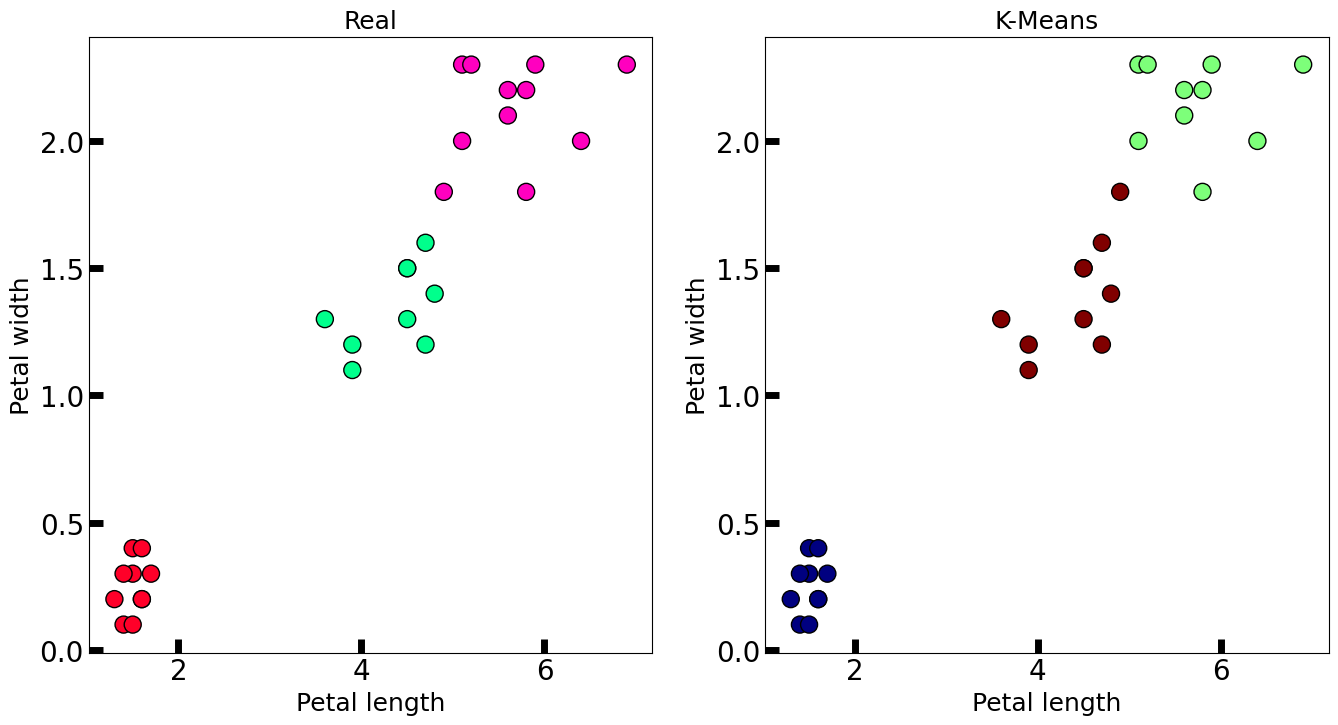

In [ ]:
#Resuultados de la clasificación

new_labels = km_Train.labels_

# Plot de los clusters identificados y reales

fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].scatter(X_test[:, 2], X_test[:, 3], c=y_test, cmap='gist_rainbow',edgecolor='k', s=150)
axes[1].scatter(X_test[:, 2], X_test[:, 3], c=y_hat, cmap='jet',edgecolor='k', s=150)
axes[0].set_xlabel('Petal length', fontsize=18)
axes[0].set_ylabel('Petal width', fontsize=18)
axes[1].set_xlabel('Petal length', fontsize=18)
axes[1].set_ylabel('Petal width', fontsize=18)
axes[0].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[1].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[0].set_title('Real', fontsize=18)
axes[1].set_title('K-Means', fontsize=18)

## 7. Hierarchical Clustering

La familia de clústers jerárquicos, agrupa las observaciones de forma iterativa hasta alcanzar un solo cluster final. El usuario es el encargado de seleccionar el número de clusters deseados al final.

En principio, cada observación es en si misma un cluster. En una segunda etapa, se agrupan las observaciones más cercanas en función de un criterio de agrupamiento de la siguiente lista:


* **Ward** minimiza la suma de cuadrados de la diferencias dentro de los clusters. Es un enfoque de minimización de la varianza y, en ese sentido, actua de forma similar a K-Means.
* **Maximum or complete linkage** minimiza la distancia máxima entre un par de clusters.
* **Average linkage** minimiza el promesio de las distancias entre todas las obsetbaciones de un par de clusters.
* **Single linkage** minimiza la distancia entre las observaciones más cercanas de un par de clusters.



Usando Scikit-learn, debemos primero importar la instancia de ```sklearn.cluster.AgglomerativeClustering```, e invocar los métodos necesarios:

1. Preparar los datos X
2. Crear instancia de ```sklearn.cluster.AgglomerativeClustering```:

``` python
hc = AgglomerativeClustering(linkage    = "ward",
                             affinity   = "euclidean"
                             n_clusters = 3
                       )
```
3. Entrenar:
```
hc.fit(X)
```
4. Identificar etiquetas de clasificación:
```
hc.labels_
```

A continuación describiremos los argumentos más comunes:


---
**```
sklearn.cluster.AgglomerativeClustering(n_clusters=2, affinity=’euclidean’, memory=None, connectivity=None, compute_full_tree=’auto’, linkage=’ward’, pooling_func=’deprecated’, distance_threshold=None)
```**

[Documentación](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering)





In [ ]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(linkage    = "ward",
                             affinity   = "euclidean",
                             n_clusters = 3
                       )
hc.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


AgglomerativeClustering(affinity='euclidean', n_clusters=3)

In [ ]:
hc.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

Text(0.5, 1.0, 'Ward')

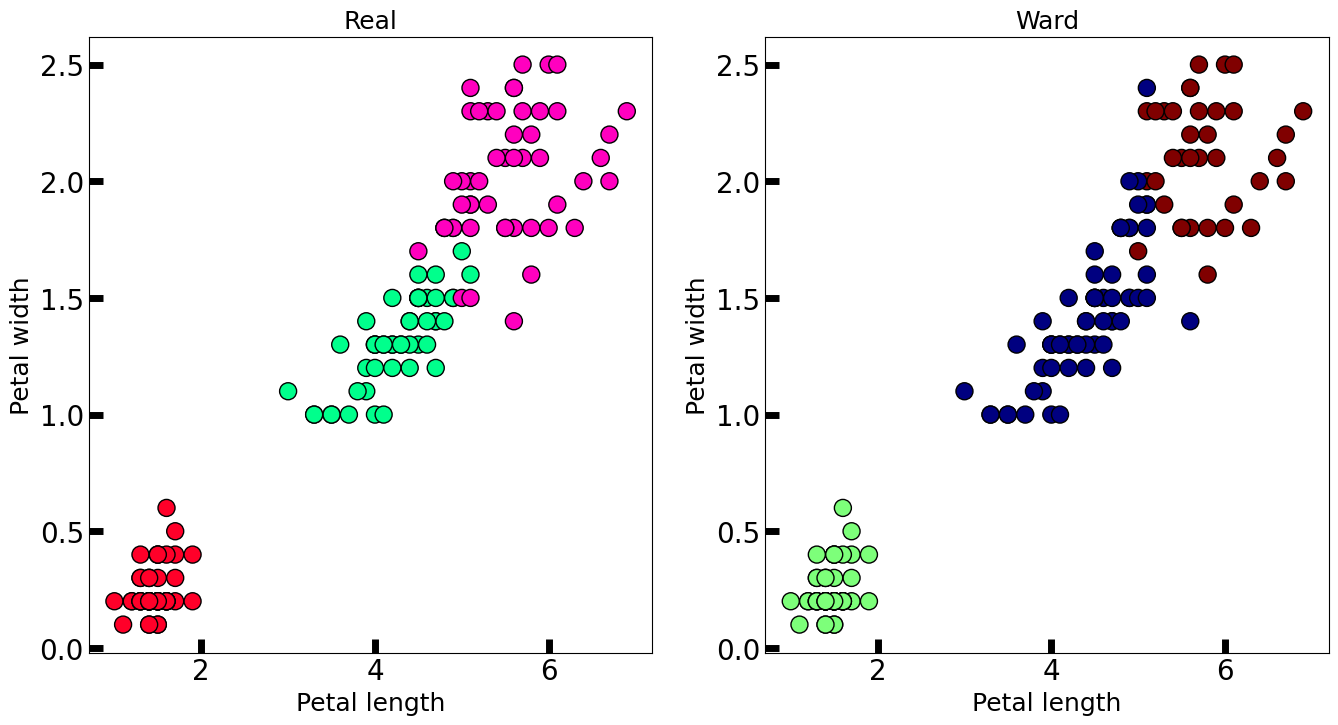

In [ ]:
#Resultados de la clasificación

new_labels = hc.labels_

# Plot de los clusters identificados y reales

fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].scatter(X[:, 2], X[:, 3], c=y, cmap='gist_rainbow',edgecolor='k', s=150)
axes[1].scatter(X[:, 2], X[:, 3], c=new_labels, cmap='jet',edgecolor='k', s=150)
axes[0].set_xlabel('Petal length', fontsize=18)
axes[0].set_ylabel('Petal width', fontsize=18)
axes[1].set_xlabel('Petal length', fontsize=18)
axes[1].set_ylabel('Petal width', fontsize=18)
axes[0].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[1].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[0].set_title('Real', fontsize=18)
axes[1].set_title('Ward', fontsize=18)

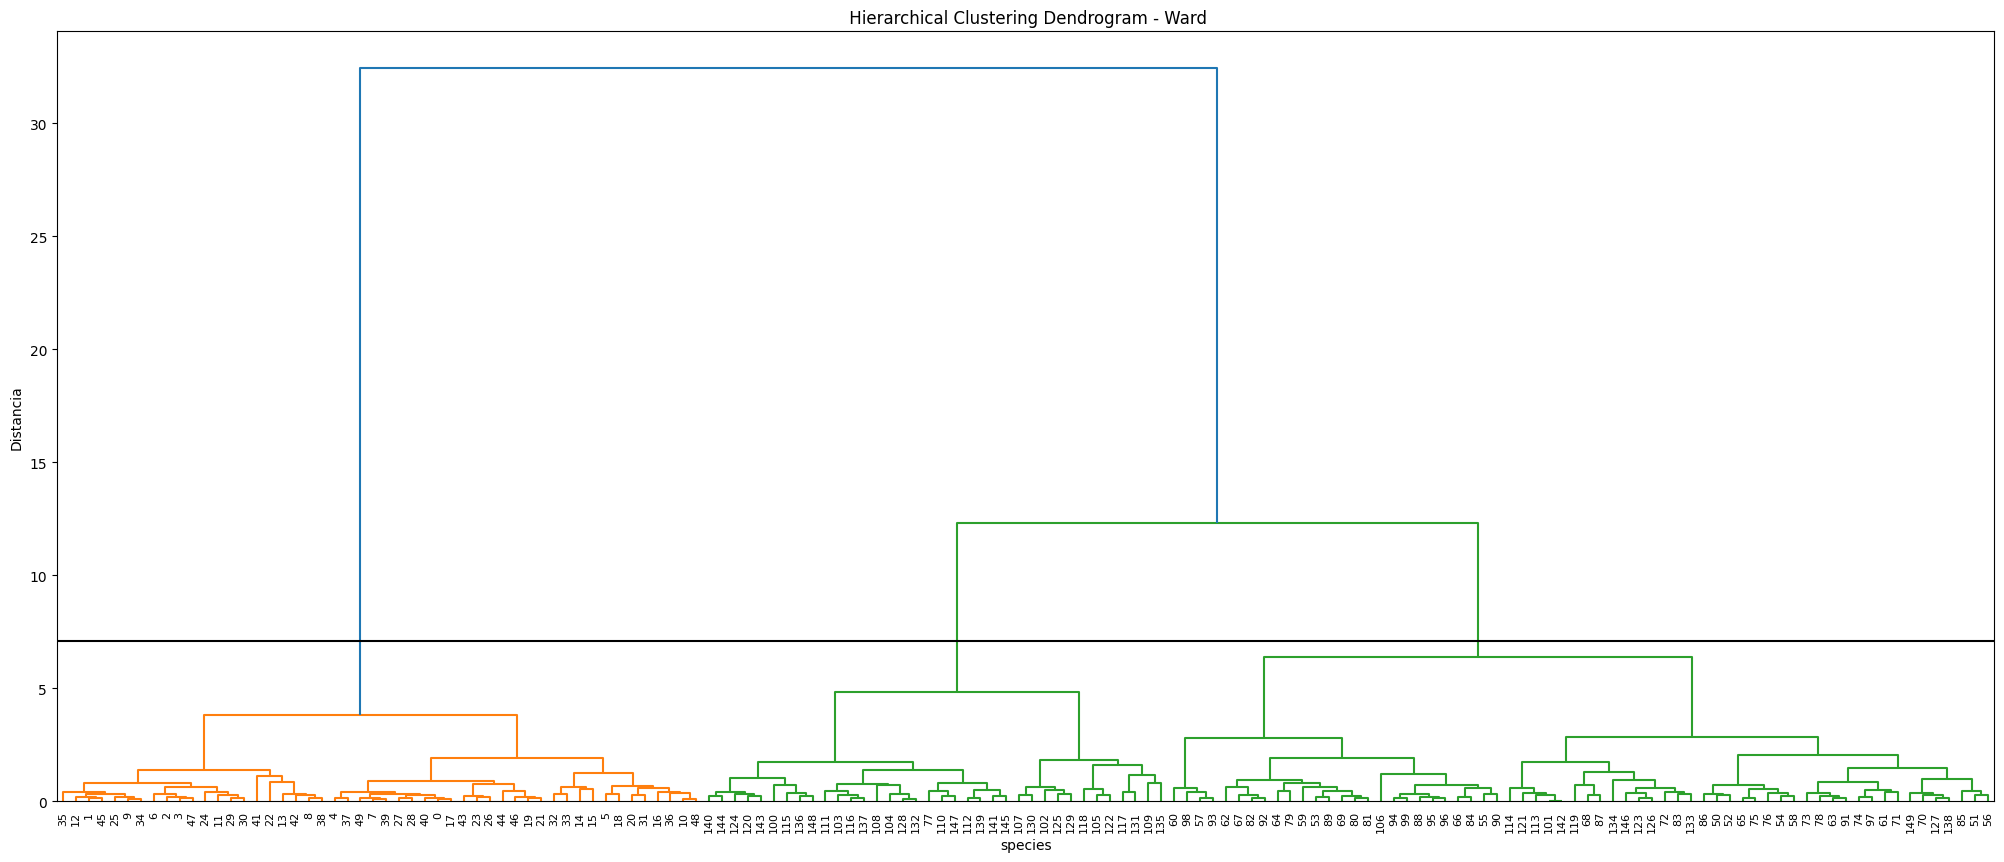

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(X,"ward")

max_d = 7.08

plt.figure(figsize=(25, 10))
plt.title(' Hierarchical Clustering Dendrogram - Ward')
plt.xlabel('species')
plt.ylabel('Distancia')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=150,                  # Try changing values of p
    leaf_rotation=90.,      # rotates the x axis labels
    leaf_font_size=8.,      # font size for the x axis labels
)
plt.axhline(y=max_d, c='k')
plt.show()

> **Ejercicio:** Replique la estimación del cluster jerárquico con otras funciones **linkage** y sobre los datos de **entrenamiento**. Utilice el método `.fit_predict` para predecir el clúster al que pertenecerán las observaciones de la base de **test**. Grafique los resultados y determine cuál de las funciones **linkage** da mejores resultados.

In [ ]:
#Su código aquí

## 8. Análisis de Componentes Principales (PCA)

Reduce la dimensionalidad de un conjunto de datos de forma lineal basándose en la descomposición de valores singulares de los datos. De esta manera, proyecta las observaciones/variables en un espacio geométrico de menores dimensiones.


Usando Scikit-learn, debemos primero importar la instancia de ```sklearn.decomposition.PCA```, e invocar los métodos necesarios:

1. Preparar los datos X
2. Crear instancia de ```sklearn.decomposition.PCA```:

``` python
pca = PCA(n_components = 2,
          copy         = True,
         random_state  = 0
         )
```
3. Entrenar:
```
pca.fit(X)
```
4. Identificar resultados:
```
pca.explained_variance_
```

A continuación describiremos los argumentos más comunes:


---
**```
sklearn.cluster.AgglomerativeClustering(n_clusters=2, affinity=’euclidean’, memory=None, connectivity=None, compute_full_tree=’auto’, linkage=’ward’, pooling_func=’deprecated’, distance_threshold=None)
```**

[Documentación](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA)





In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2,
          copy         = True,
         random_state  = 0)
pca.fit(X)

PCA(n_components=2, random_state=0)

In [ ]:
pca.explained_variance_ratio_

array([0.92461872, 0.05306648])

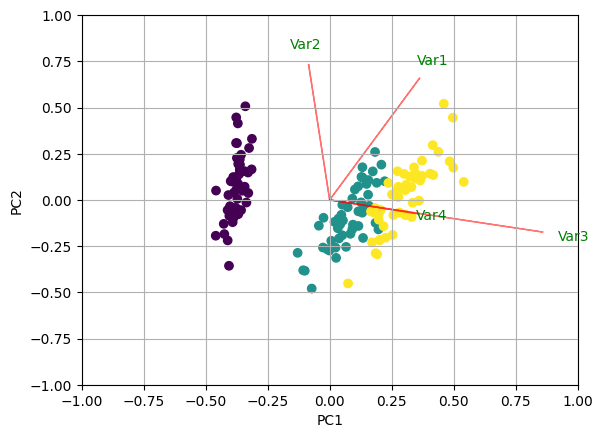

In [ ]:
x_new = pca.fit_transform(X)

def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley, c = y)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

#Call the function. Use only the 2 PCs.
myplot(x_new[:,0:2],np.transpose(pca.components_[0:2, :]))
plt.show()